<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/03_Neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow**

| Hyperparameter | Binary Classification | Multiclass Classification |
| :------------- | :-------------------- | :------------------------ |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum=unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, genrally 10 to 100 | Same as binary classification |
| Output layer shape | 1(one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually `ReLU`(rectified linear unit) | Same as binary classification |
| Ouput activation | `Sigmoid` | `Softmax` |
| Loss function | `Cross entropy`(`tf.keras.losses.BinaryCrossentropy` in Tensorflow) |`Cross entropy`(`tf.keras.losses.CategoricalCrossentropy` in Tensorflow) |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` | Same as binary classification |

# **Introduction to Neural networks classification with Tensorflow**

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classfication
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [101]:
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


In [102]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [103]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [104]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

 Our data is a little hard to understand right now... let's visualize it

In [105]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


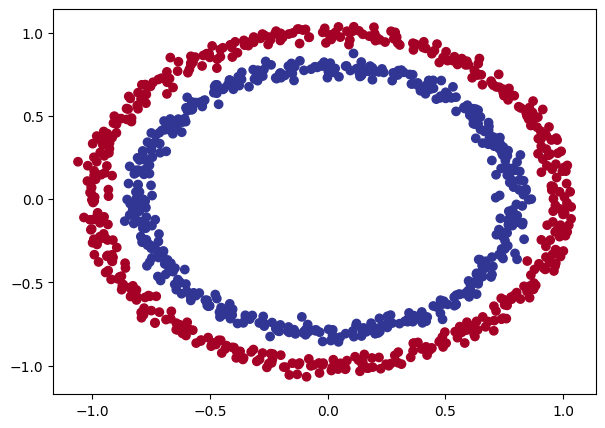

In [106]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77858&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)**

## Input and output shapes

In [107]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [108]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [109]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate the model

In [110]:
# Building a neural network model for classification
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model using Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4585 - loss: 4.8882   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4872 - loss: 3.3618 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4864 - loss: 0.8068
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4850 - loss: 0.7298 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4836 - loss: 0.7091 


## Improving model

1.  `Create a model` - we might to add more layers or increase the number of hidden units within a layer.
2. `Compiling a model` - here we might choose a different optimization function such as **Adam** instead of **SGD()**.
3. `Fitting a model` - we can leave our model for a longer training period time.

In [111]:
# Let's try and imporve our model by training fro longer,
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step thimngs up a notch and add an extra layer.

> ## `Build model_1`

In [112]:
tf.random.set_seed(42)

# 1. create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)

In [113]:
# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4955 - loss: 0.6934   


[0.6932075023651123, 0.5]

> ## ` Build model_2`

In [114]:
# Build model_2

tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # changing optimizer to Adam
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [115]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034


[0.0041804127395153046, 1.0]

To visualize our model's prediction let's create a function. `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values
* Make predictions accross meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0])>1:
    print("This is a multicalss classification....")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("This is a Binary classification....")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


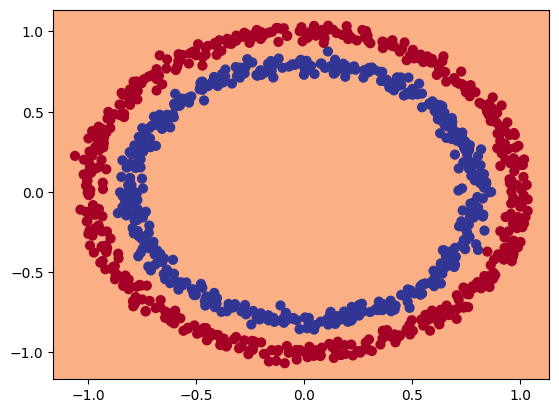

In [117]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

In [118]:

# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Creating regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y= X + 100

# Splitting into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_2.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_21_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Encountered an error , which is pretty obvious.

**Reason** -> We compiled our `model_2` on the classification fundamentals and packages, such as BinaryCrossentropy, accuracy..

> Let's change our model to suit our regression problem

In [119]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile the model ( here comes the change for regression problem)
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 496.7240 - mae: 496.7240
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 474.7049 - mae: 474.7049 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 457.4897 - mae: 457.4897
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 434.0179 - mae: 434.0179
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 410.3477 - mae: 410.3477
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 384.9771 - mae: 384.9771
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 358.3231 - mae: 358.3231
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 330.5696 - mae: 330.5696
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 301.7443 - mae: 301.7443
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 269.4839 - mae: 269.4839
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 227.6830 - mae: 227.6830
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 180.8433 - mae: 180.8433
E

In [120]:
model_2.evaluate(X_reg_test, y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 58.8967 - mae: 58.8967 


[61.59755325317383, 61.59755325317383]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


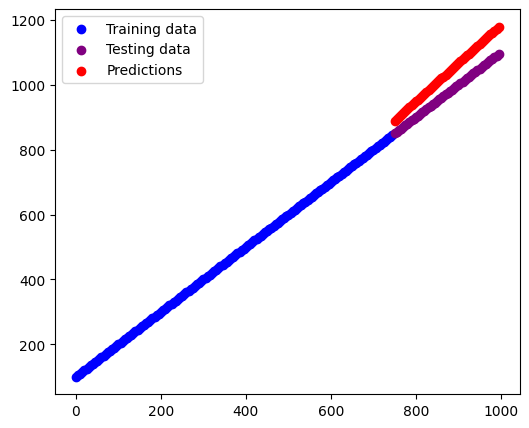

In [121]:
# Making predictions
y_reg_pred = model_2.predict(X_reg_test)
plt.figure(figsize=(6,5))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="purple", label="Testing data")
plt.scatter(X_reg_test, y_reg_pred, c="red", label="Predictions")
plt.legend()

## The missing piece : Non-linearity

In [122]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

# 2. Compile a model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4255 - loss: 4.8264
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4189 - loss: 4.7943 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4098 - loss: 4.6911 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4054 - loss: 4.6639
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4054 - loss: 4.6603
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4054 - loss: 4.6586
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4046 - loss: 4.6570
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4038 - loss: 4.6497
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4015 - loss: 4.6399
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4015 - loss: 4.6359
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4015 - loss: 4.6339
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

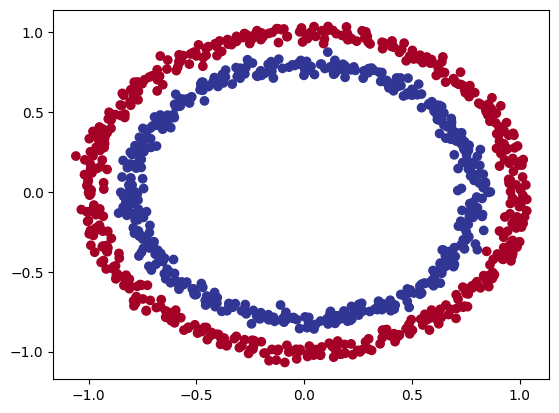

In [123]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


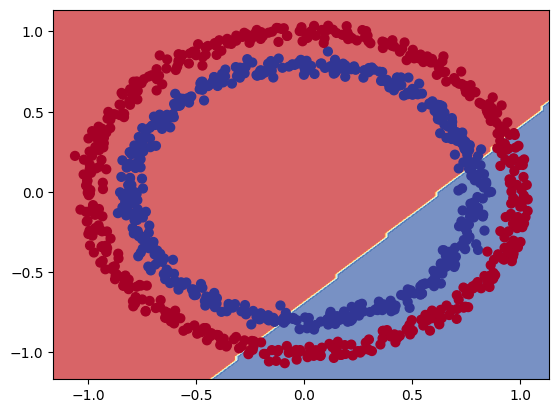

In [124]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [125]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

# 2. Compile a model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4763 - loss: 6.5363
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4758 - loss: 6.5306 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4758 - loss: 6.4882
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4758 - loss: 6.4615
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4212
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4199
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4190
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4181
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4173
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.4165
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


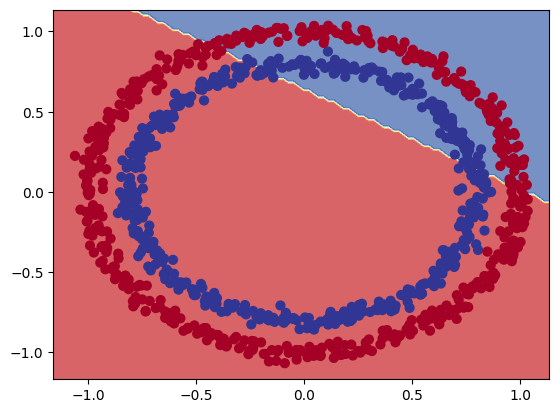

In [126]:
plot_decision_boundary(model = model,
                       X=X,
                       y=y)

In [127]:
# Time to replicate the multi-layer neural network playground from Tensorflow playground

tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4830 - loss: 4.0872
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 2.8061
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 2.4106
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4826 - loss: 2.1582
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4511 - loss: 1.6996
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4437 - loss: 1.2700
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4594 - loss: 1.2313
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4623 - loss: 1.2091
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4547 - loss: 1.1890
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4561 - loss: 1.1706
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4573 - loss: 1.1531
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [128]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6925 - loss: 0.5811  


[0.5620811581611633, 0.7350000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


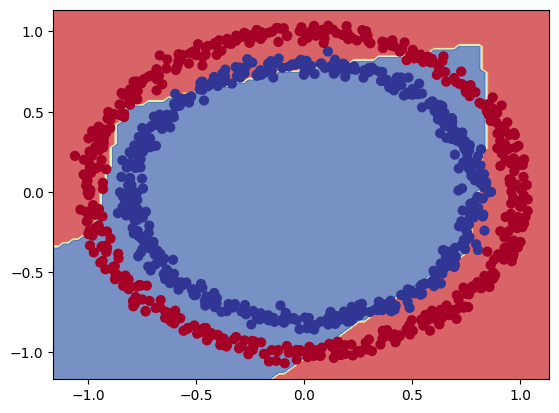

In [129]:
# How do our model predictions look
plot_decision_boundary(model_5, X, y)

Let's again try one more time to fit this yellow circle line in between the data points

In [130]:
# Setting random seed
tf.random.set_seed(42) # for reproducability

# 1. Create a model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),  # changing activation for output layer
])

# 2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5221 - loss: 0.7016
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5187 - loss: 0.6994
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5216 - loss: 0.6982
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4816 - loss: 0.6974
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4425 - loss: 0.6968
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4840 - loss: 0.6961
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 0.6957
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4698 - loss: 0.6952
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4670 - loss: 0.6947
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4636 - loss: 0.6942
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4615 - loss: 0.6937
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

Woah Woah Woah!!!
we got accuracy of more than 90% , crazily awesome.

In [131]:
# Let's evaluate the model
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9387 - loss: 0.3010


[0.2934010326862335, 0.9520000219345093]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


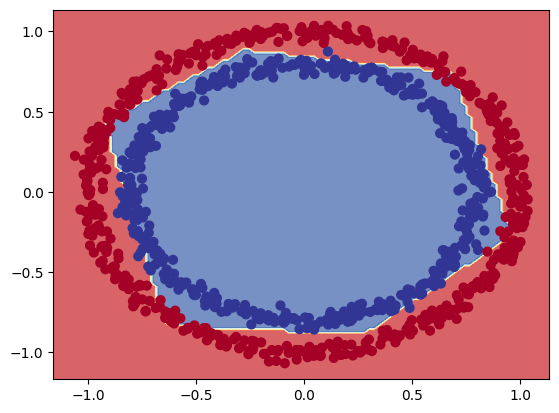

In [132]:
# Let's visualize the predictions
plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

**`Note`** - The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [133]:
# Create a tensor (similar to the data we passs into our models)
tensor = tf.cast(tf.range(-10, 10), dtype=tf.float32)
tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

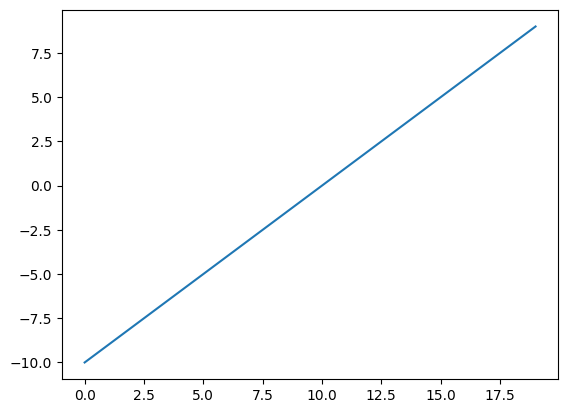

In [134]:
# Visualize our tensor
plt.plot(tensor)

In [135]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using signoid function on tensor
sigmoid(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

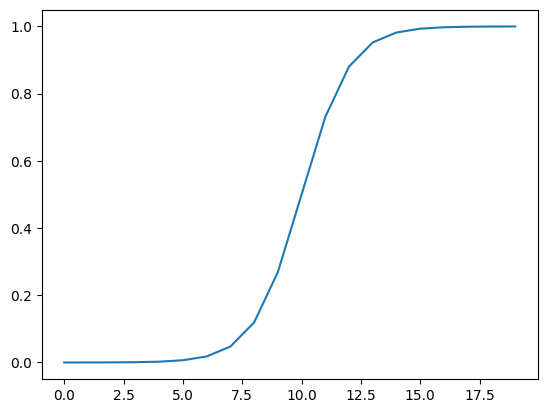

In [136]:
# Plotting sigmoid tensor
plt.plot(sigmoid(tensor))

In [137]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0, x)

# Using relu on tensor
relu(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

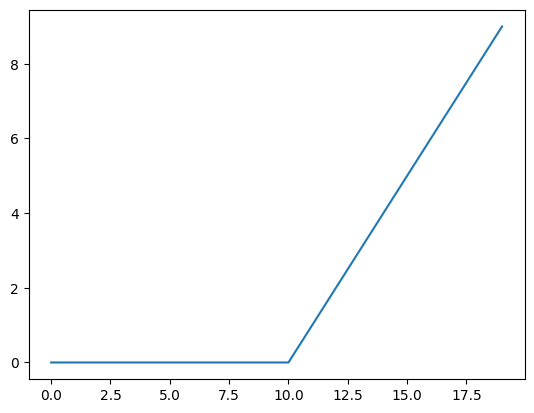

In [138]:
# Visualize tensors via relu
plt.plot(relu(tensor))

In [139]:
# Let's replicate the tanh activation function
def tanh(x):
  return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

# Using tanh into our tensor
tanh(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

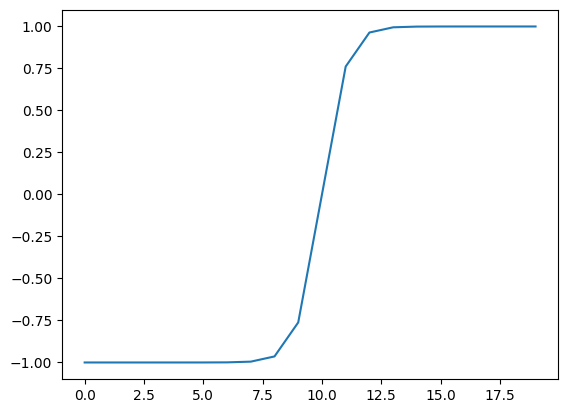

In [140]:
# Visualizing tensor
plt.plot(tanh(tensor))

## Evaluating and improving our classification model


So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set.

In [141]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [142]:
# Splitting data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [143]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [144]:
# Let's recreate a model to fit on training data and evaluating on testing data
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the data
history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4419 - loss: 0.6987
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4952 - loss: 0.6924
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5036 - loss: 0.6913
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5063 - loss: 0.6896  
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 0.6859 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5376 - loss: 0.6804 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5558 - loss: 0.6714 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6513 - loss: 0.6563 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.6362 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6049 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 0.5630 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [145]:
# Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9734 - loss: 0.0878  


[0.09673458337783813, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


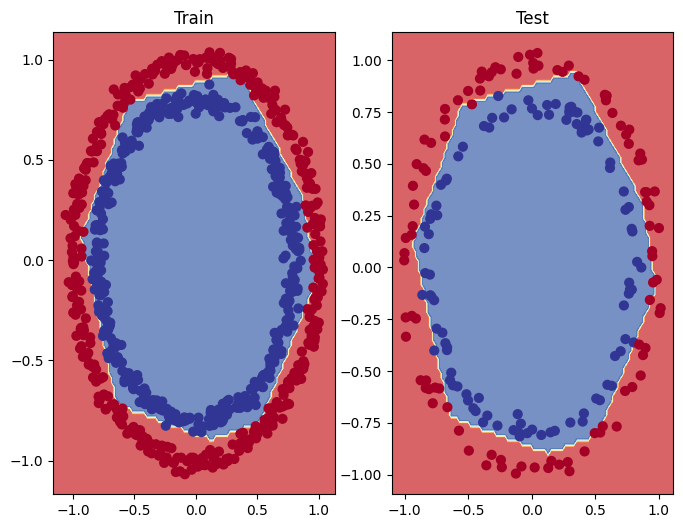

In [146]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X= X_test, y=y_test)
plt.show()

In [147]:
history.history

{'accuracy': [0.4724999964237213,
  0.49000000953674316,
  0.5112500190734863,
  0.5112500190734863,
  0.518750011920929,
  0.5299999713897705,
  0.5649999976158142,
  0.6462500095367432,
  0.6962500214576721,
  0.7587500214576721,
  0.768750011920929,
  0.7987499833106995,
  0.8037499785423279,
  0.8274999856948853,
  0.8412500023841858,
  0.8612499833106995,
  0.8637499809265137,
  0.8725000023841858,
  0.8824999928474426,
  0.9300000071525574,
  0.9449999928474426,
  0.9612500071525574,
  0.9662500023841858,
  0.9712499976158142,
  0.9700000286102295,
  0.9700000286102295,
  0.9662500023841858,
  0.9674999713897705,
  0.96875,
  0.9725000262260437,
  0.9725000262260437,
  0.9737499952316284,
  0.9750000238418579,
  0.9787499904632568,
  0.9837499856948853,
  0.9862499833106995,
  0.987500011920929,
  0.9900000095367432,
  0.9912499785423279,
  0.9887499809265137,
  0.987500011920929,
  0.9887499809265137,
  0.9900000095367432,
  0.9887499809265137,
  0.987500011920929,
  0.987500011

In [148]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.47250,0.695292
1,0.49000,0.692202
2,0.51125,0.690723
3,0.51125,0.688774
4,0.51875,0.685049
5,0.53000,0.679546
6,0.56500,0.671363
7,0.64625,0.657359
8,0.69625,0.637854
9,0.75875,0.605268


Text(0.5, 1.0, 'Model_7 loss curves')

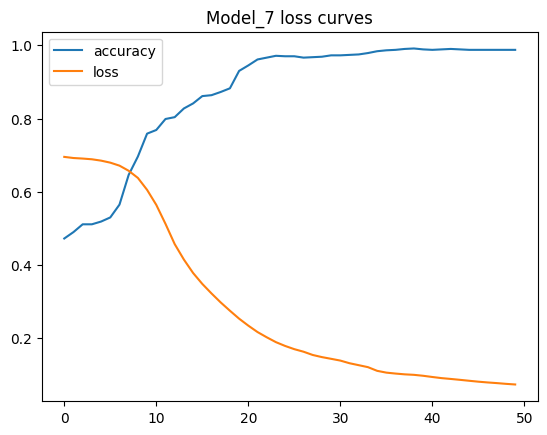

In [149]:
## Plot the loss (or training) curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

**NOTE:** For many problems, the loss funciton going down means the model is improving (the predictions it's making are getting closer to the ground turth labels).

## Finding the best learning rate


TO find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to yout *while* its training.
* Another model (we could use the same one as above).
* A modified loss curve plot.

In [150]:
# setting random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4895 - loss: 0.7079 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 0.7076 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4887 - loss: 0.7072 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4949 - loss: 0.7069 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 0.7065 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4891 - loss: 0.7060 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.7056 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4875 - loss: 0.7051 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4848 - loss: 0.7046 - learning_

Text(0.5, 0, 'epochs')

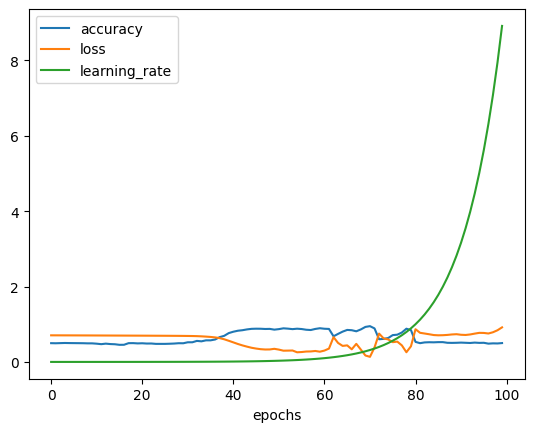

In [151]:
# Check out the histroy
pd.DataFrame(history_8.history).plot()
plt.xlabel("epochs")

Text(0.5, 1.0, 'Learning rate v/s Loss')

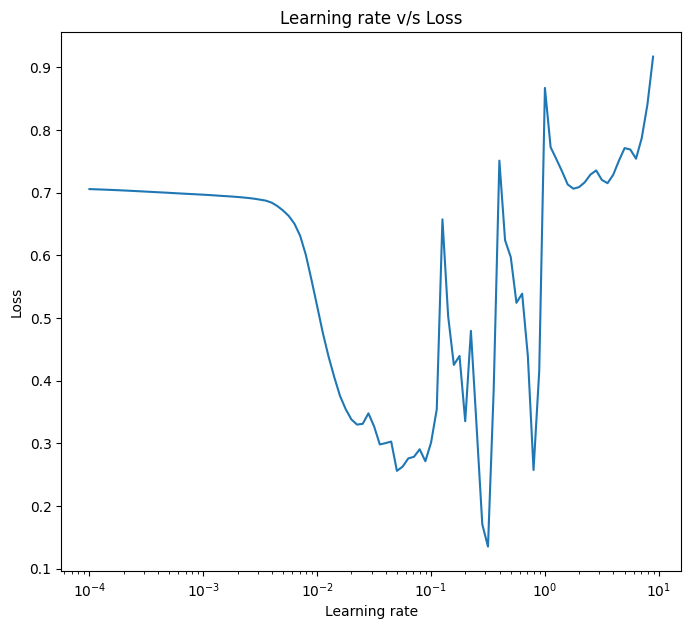

In [152]:
# Let's plot learning rate values versues the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(8,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate v/s Loss")

In [153]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [154]:
# Let's try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=45)

Epoch 1/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4879 - loss: 0.7022
Epoch 2/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5348 - loss: 0.6802
Epoch 3/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5742 - loss: 0.6657
Epoch 4/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6005 - loss: 0.6411
Epoch 5/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.5918
Epoch 6/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.5379 
Epoch 7/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4857 
Epoch 8/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8191 - loss: 0.4447 
Epoch 9/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.4149 
Epoch 10/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.3871 
Epoch 11/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3631 
Epoch 12/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.878

In [155]:
model_9.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9951 - loss: 0.0436  


[0.043780919164419174, 0.9900000095367432]

In [156]:
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9734 - loss: 0.0878 


[0.09673458337783813, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
This is a Binary classification....
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


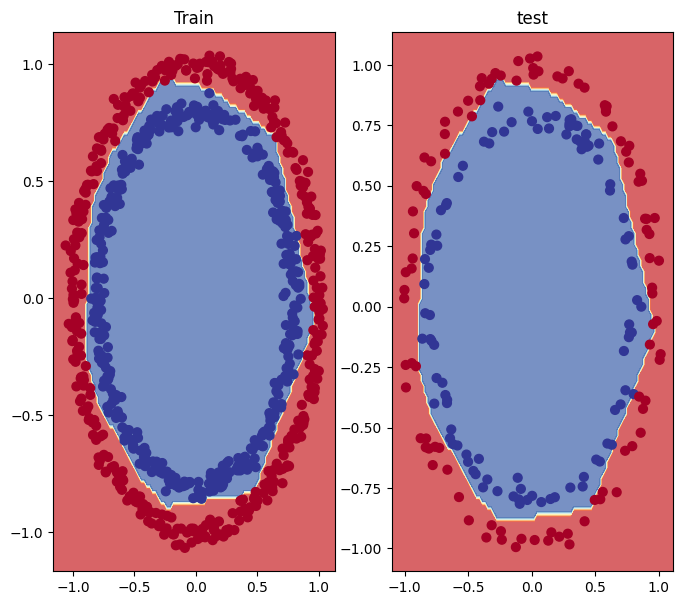

In [157]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(8,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()

## Classification evaluation methods


| Metric Name | When to Use |
| :---------- | :---------- |
| `Accuracy` | Default metric for classification problems. Not the best for imbalanced classes. |
| `Precision` | Higher precision leads to less false positives. |
| `Recall` | Higher recall leads to less false negatives. |
| `F1-Score` | Combination of precision and recall, usually a good overall metric for a classification model. |
| `Confusion Matrix` | When comparing predicitons to labels to see where model gets confused. Can be hard to use with large number of classes. |




**Note:** There exists a tradeoff between precision and recall.


## More classification evaluation methods

Alongside visualizing our results as much possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [158]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss} ")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9951 - loss: 0.0436 
Model loss on the test set: 0.043780919164419174 
Model accuracy on the test set:  99.00%


Let's build a confusion matrix...

In [159]:
# Building up a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_9.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [160]:
y_test[:5], y_pred[:5]

(array([1, 0, 1, 0, 1]),
 array([[0.9964588 ],
        [0.06428511],
        [0.9999789 ],
        [0.21000654],
        [0.99881387]], dtype=float32))

Oops... looks like our predictions array has come out in prediction probability form.. the standard output from the sigmoid (or softmax) activation functions.

In [161]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [162]:
# Now creating confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  1],
       [ 1, 99]])

How about we prettify our confusion matrix?

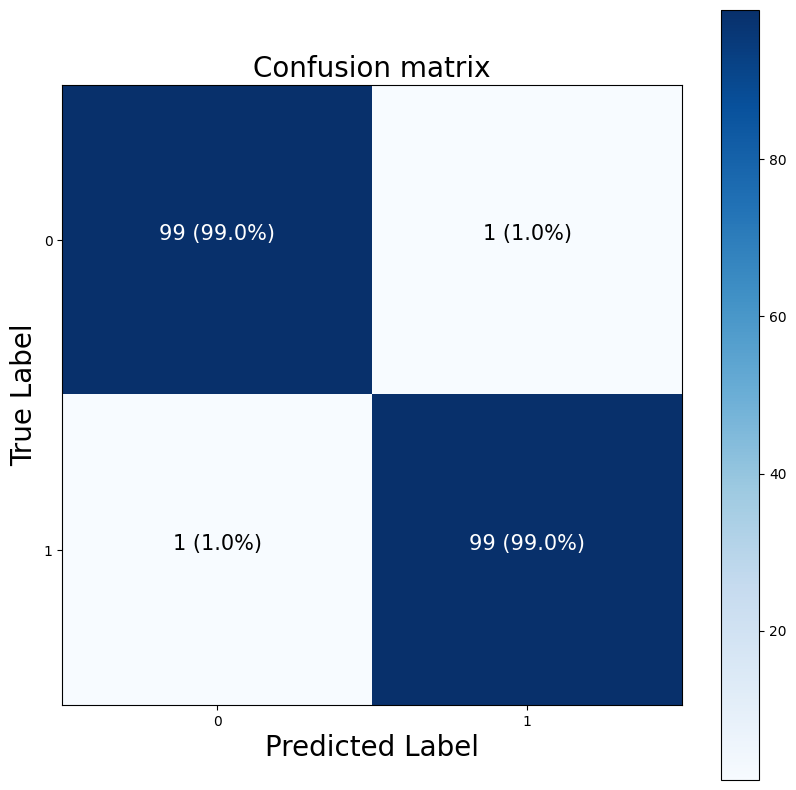

In [166]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if(classes):
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels= labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_normal[i,j]*100:.1f}%)" ,
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)